This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. *The objective is to predict based on diagnostic measurements whether a patient has diabetes*.

## Dataset information

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Relevant papers

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). [Using the ADAP learning algorithm to forecast the onset of diabetes mellitus](http://rexa.info/paper/04587c10a7c92baa01948f71f2513d5928fe8e81). *In Proceedings of the Symposium on Computer Applications and Medical Care* (pp. 261--265). IEEE Computer Society Press.

## Data Attributes:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)

[link to example](https://www.kaggle.com/hugues/d/uciml/pima-indians-diabetes-database/basic-ml-best-of-10-classifiers/notebook)

[link to dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [68]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#for table-like data and matrices
import numpy as np
import pandas as pd

#Visualisation
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

#Configure Visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [6]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

In [2]:
indata = pd.read_csv("./input/diabetes.csv")
indata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
describe_more(indata)

,Datatype,Levels,Variable
8,int64,2,Outcome
0,int64,17,Pregnancies
2,int64,47,BloodPressure
3,int64,51,SkinThickness
7,int64,52,Age
1,int64,136,Glucose
4,int64,186,Insulin
5,float64,248,BMI
6,float64,517,DiabetesPedigreeFunction


In [4]:
print('# of rows', len(indata))
print('# of columns', len(indata.columns))
indata.describe()

# of rows 768
# of columns 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Checking for missing data
print('# of missing data', indata.isnull().any().sum())

# of missing data 0


Pre-Processing and Analysis of the data

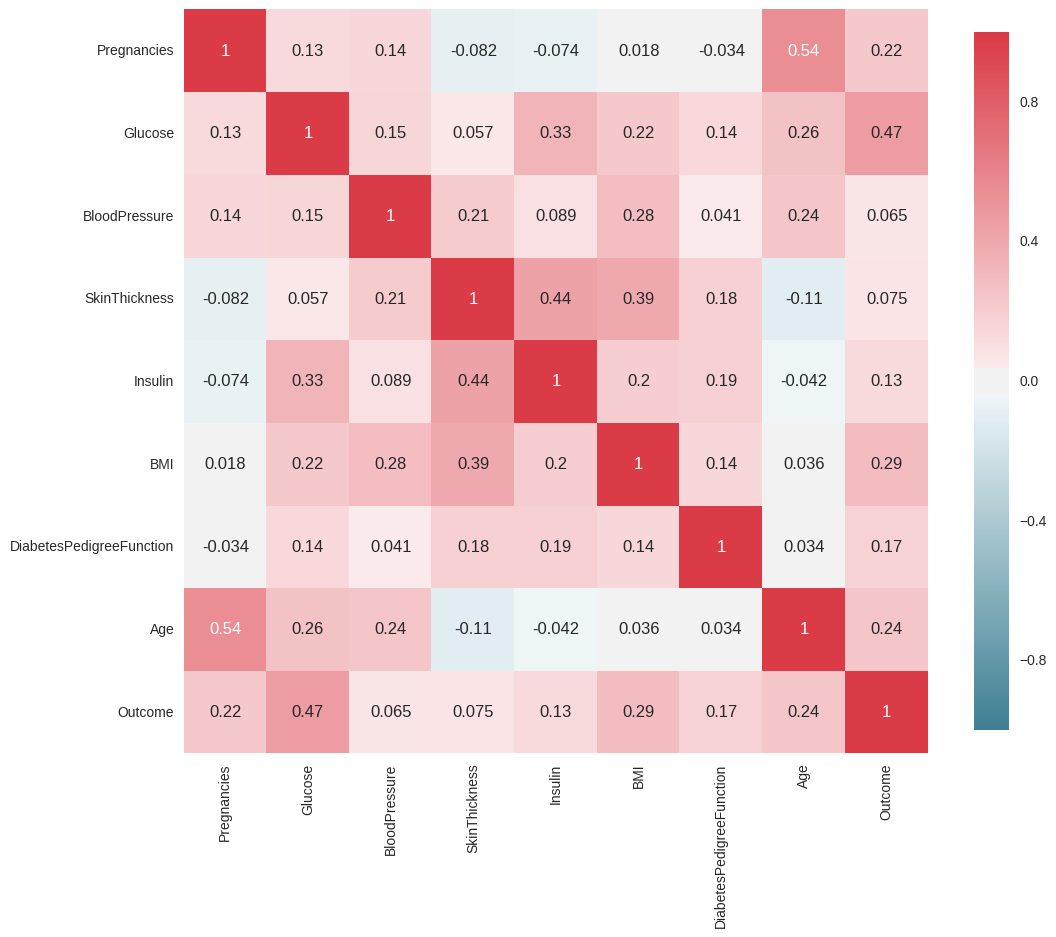

In [10]:
# sns.heatmap(indata.corr())
plot_correlation_map(indata)

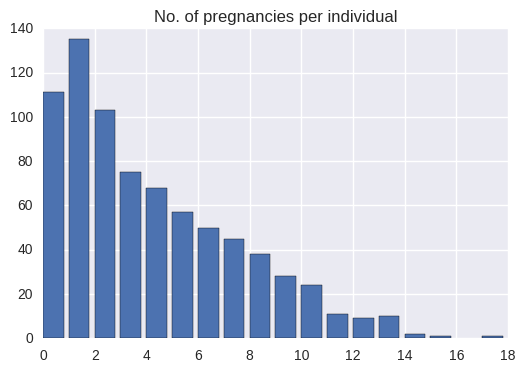

In [43]:
preg_count = indata.groupby('Pregnancies').Pregnancies.count()

values = preg_count.values
indx   = preg_count.index
# print(indx)
# print(values)
# print(sum(values))

mean = sum(values)/len(indx)
variance = np.sqrt(sum((values-mean)**2)/len(indx))

plt.bar(indx, values)
plt.title('No. of pregnancies per individual')
plt.xticks(rotation='horizontal')
plt.show()

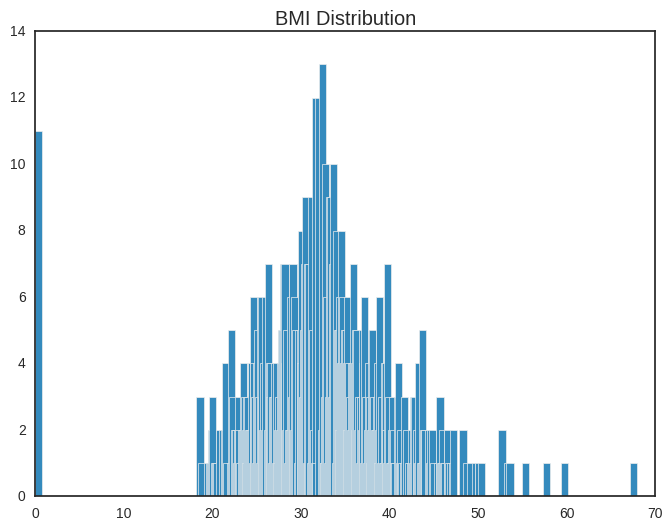

In [7]:
preg_count = indata.groupby('BMI').BMI.count()

values = preg_count.values
indx   = preg_count.index
# print(indx)
# print(values)
# print(sum(values))

mean = sum(values)/len(indx)
variance = np.sqrt(sum((values-mean)**2)/len(indx))

plt.bar(indx, values)
plt.title('BMI Distribution')
plt.xticks(rotation='horizontal')
plt.show()

In [11]:
#filter bad values
print(indata.min())
print("-----------------------------------")
print("-----------------------------------")
print(indata.max())
print("-----------------------------------")
print("-----------------------------------")
print(indata.idxmin())
print("-----------------------------------")
print("-----------------------------------")
print(indata.idxmax())

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64
-----------------------------------
-----------------------------------
Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64
-----------------------------------
-----------------------------------
Pregnancies                   4
Glucose                      75
BloodPressure                 7
SkinThickness                 2
Insulin                       0
BMI                           9
Diab

In [14]:
r_indx = 9
# print("height", indata.iloc[r_indx,6])
# print("weight", indata.iloc[r_indx,3])
print(indata.iloc[r_indx,])
# print("age", indata.iloc[r_indx,23])

Pregnancies                   8.000
Glucose                     125.000
BloodPressure                96.000
SkinThickness                 0.000
Insulin                       0.000
BMI                           0.000
DiabetesPedigreeFunction      0.232
Age                          54.000
Outcome                       1.000
Name: 9, dtype: float64


In [15]:
#To check for outlier points

low = .002
high = .998
qdf = indata.quantile([low, high])

# print(qdf.loc[low,'age'])
qdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.002,0.000,0.000,0.000,0.000,0.000,0.0000,0.084534,21.000,0.0
0.998,14.466,197.466,111.864,61.398,709.824,58.2786,2.307106,70.932,1.0


In [33]:
df = indata.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
from scipy import stats
df = indata[(np.abs(stats.zscore(df)) < 3.6).all(axis=1)].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 730 non-null int64
Glucose                     730 non-null int64
BloodPressure               730 non-null int64
SkinThickness               730 non-null int64
Insulin                     730 non-null int64
BMI                         730 non-null float64
DiabetesPedigreeFunction    730 non-null float64
Age                         730 non-null int64
Outcome                     730 non-null int64
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
df = df[df.BMI != 0]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 730 non-null int64
Glucose                     730 non-null int64
BloodPressure               730 non-null int64
SkinThickness               730 non-null int64
Insulin                     730 non-null int64
BMI                         730 non-null float64
DiabetesPedigreeFunction    730 non-null float64
Age                         730 non-null int64
Outcome                     730 non-null int64
dtypes: float64(2), int64(7)
memory usage: 57.0 KB


In [38]:
#To check for outlier points
low = .002
high = .998
qdf = df.quantile([low, high])
qdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.002,0.0,56.458,0.000,0.000,0.0,18.2000,0.084458,21.000,0.0
0.998,14.0,197.542,112.168,55.084,480.0,54.1756,1.469130,69.542,1.0


In [32]:
indata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


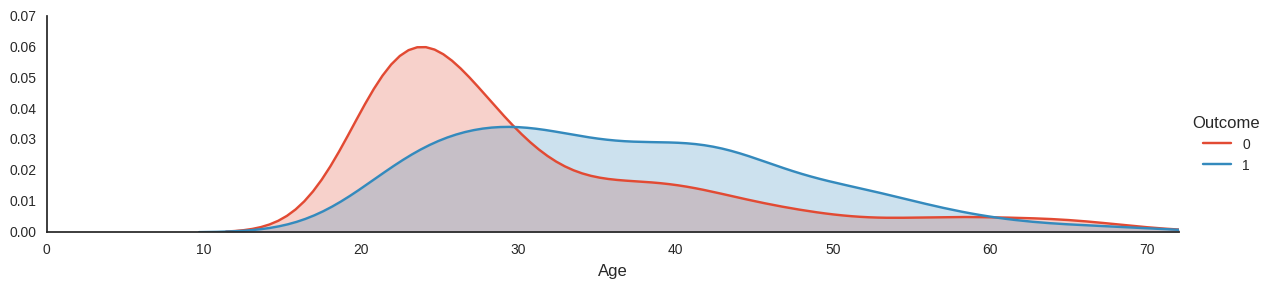

In [42]:
#distribution of males and females from different age groups with and without diabetes
plot_distribution( df , var = 'Age' , target = 'Outcome')

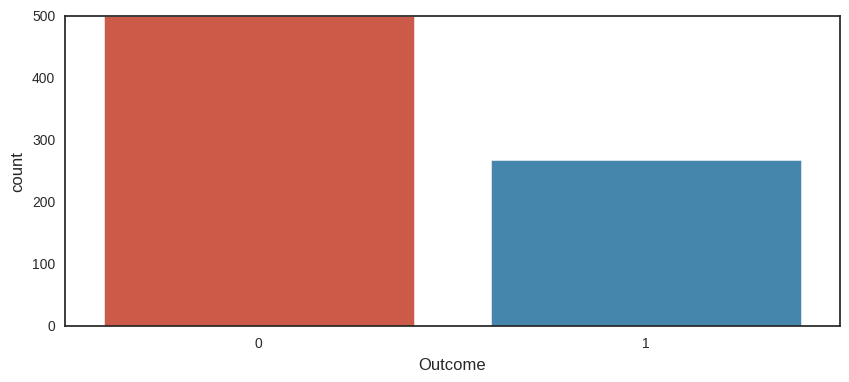

In [46]:
# response - ppl who have diabetes!!!
fig, (axis1) = plt.subplots(1,1,figsize=(10,4))
sns.countplot(x=indata["Outcome"], order=[0,1], ax=axis1)

In [40]:
# f = open("/home/grdstu/Documents/Courses/CS7641_ML/Assignments/1/src/input/diabetes.csv")
# f.readline()  # skip the header
# data = np.loadtxt(f, delimiter = ',')
# X = data[:, :-1]
# y = data[:, -1]

In [59]:
#Filtered Data
X = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [55]:
#All Data
X = indata.drop(["Outcome"],axis=1)
y = indata["Outcome"]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [51]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Neural Net", "AdaBoost"]

In [52]:
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    MLPClassifier(),
    AdaBoostClassifier()
]

In [57]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores


For full data

In [58]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

            AdaBoost | Accuracy: 72.57% (+/- 8.32%)
             RBF SVM | Accuracy: 64.24% (+/- 0.44%)
          Neural Net | Accuracy: 65.79% (+/- 7.77%)
          Linear SVM | Accuracy: 76.04% (+/- 5.58%)
       Decision Tree | Accuracy: 66.15% (+/- 4.79%)
   Nearest Neighbors | Accuracy: 71.18% (+/- 7.56%)


For filtered data

In [90]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

            AdaBoost | Accuracy: 72.57% (+/- 8.32%)
             RBF SVM | Accuracy: 64.24% (+/- 0.44%)
          Neural Net | Accuracy: 65.79% (+/- 7.77%)
          Linear SVM | Accuracy: 76.04% (+/- 5.58%)
       Decision Tree | Accuracy: 66.15% (+/- 4.79%)
   Nearest Neighbors | Accuracy: 71.18% (+/- 7.56%)


In [60]:
# dt = DecisionTreeClassifier(min_samples_split=20, random_state=99)
# dt.fit(X, y)
model  = DecisionTreeClassifier(criterion = 'entropy')
model  = model.fit(X_train, y_train)

In [91]:
import os
import subprocess

In [94]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "tree.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [95]:
visualize_tree(model , df.columns)

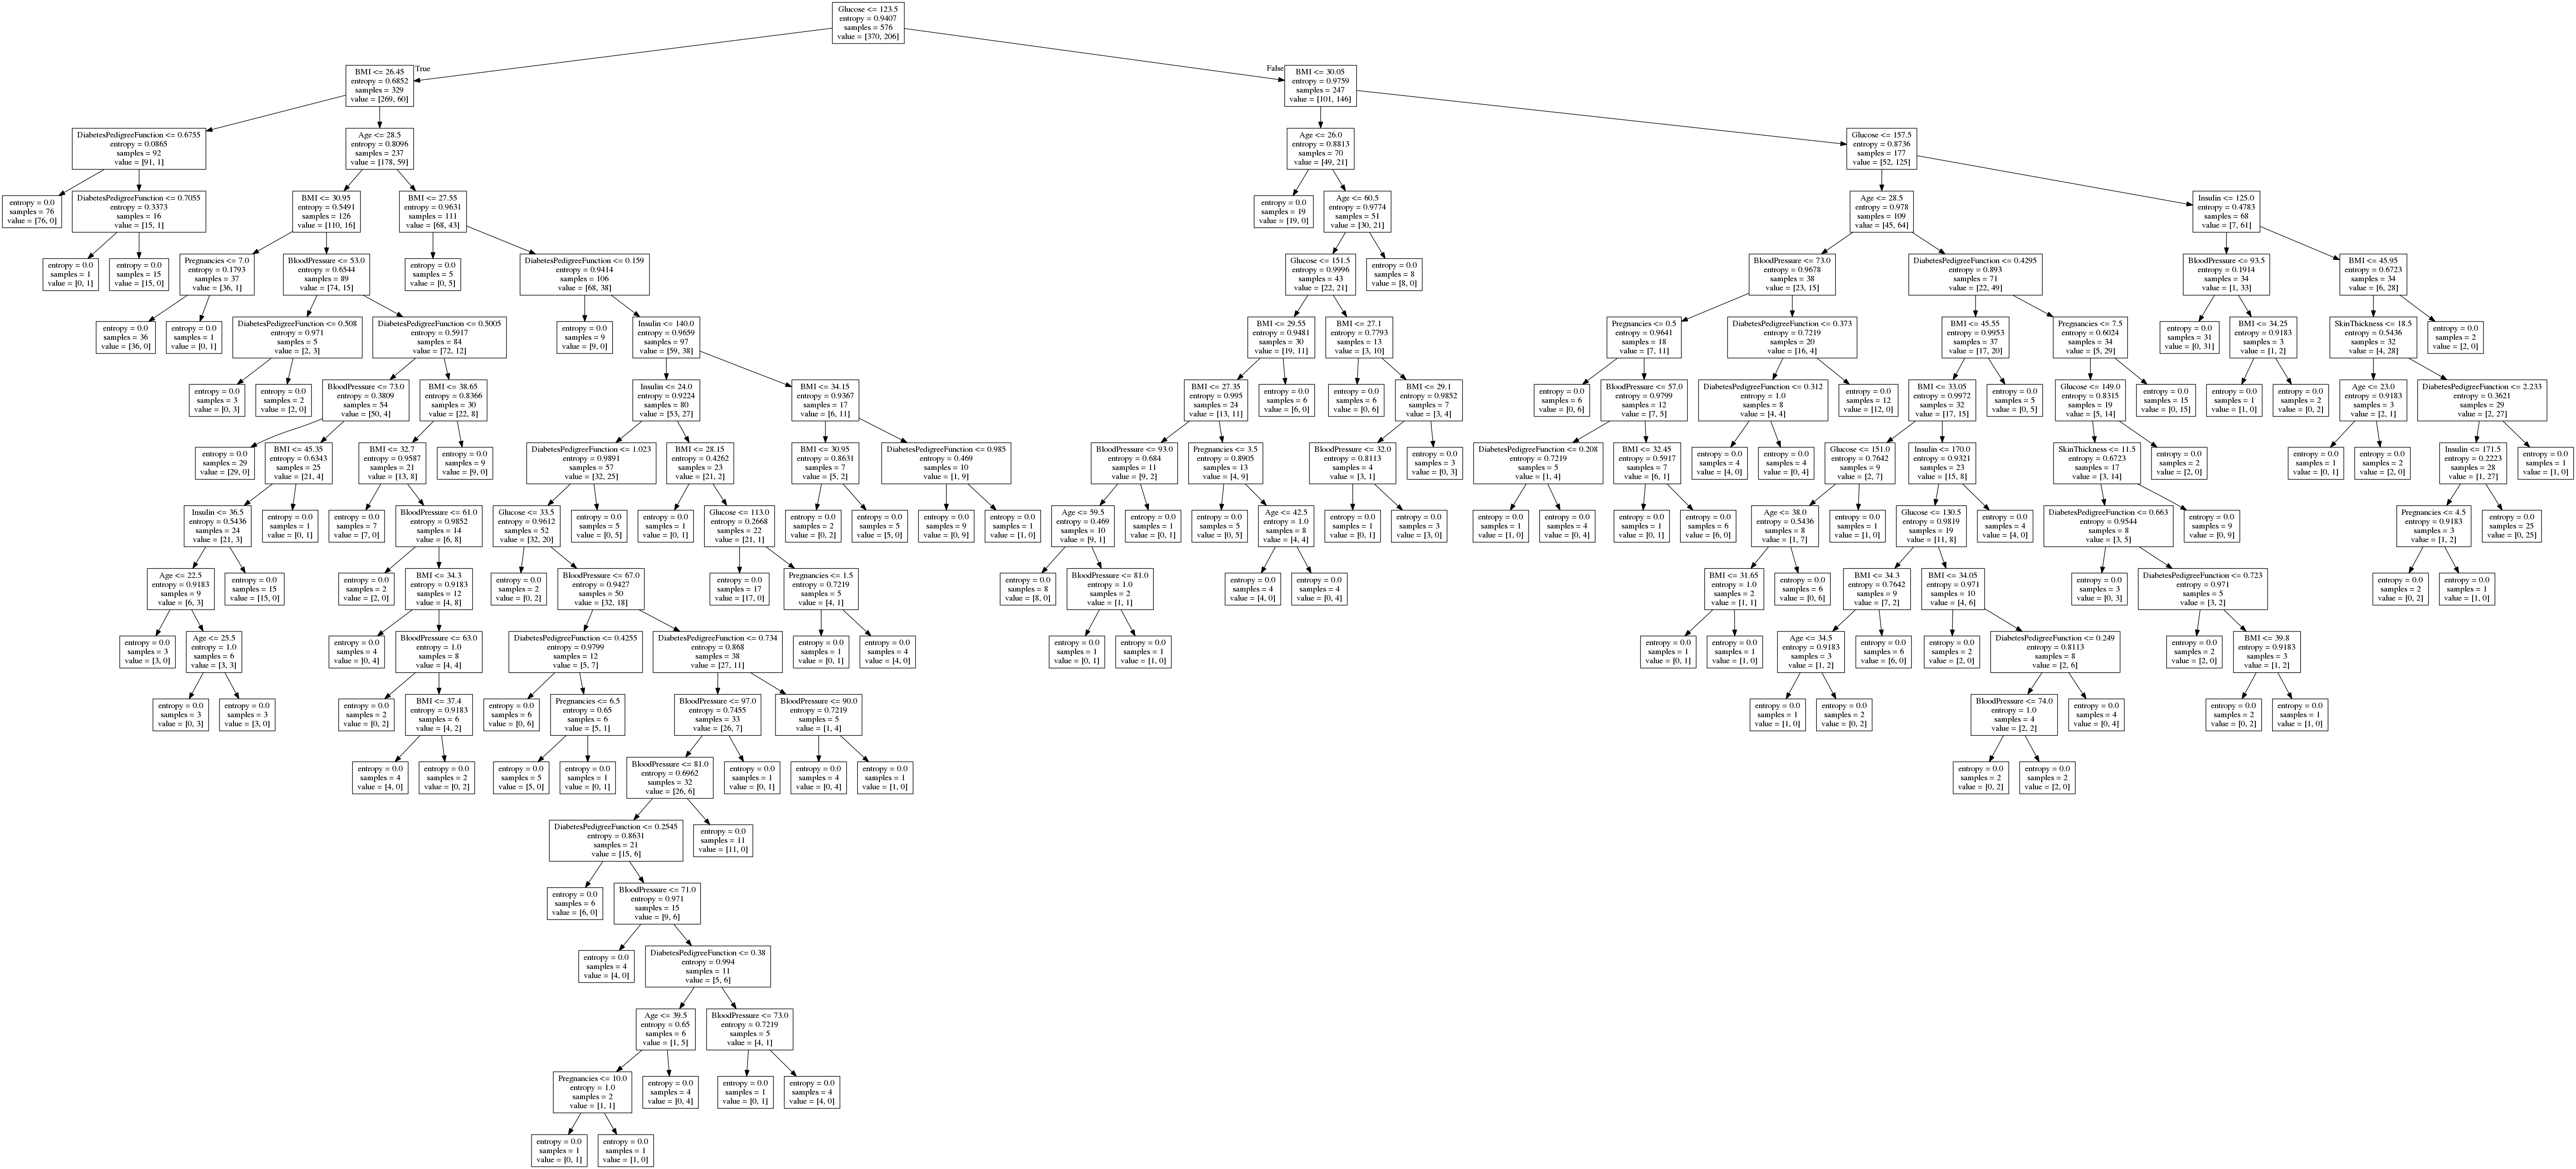

In [96]:
from IPython.display import Image
Image("./dt.png")

In [86]:
import pydotplus as pydot

In [107]:
from sklearn.grid_search import GridSearchCV

clf = SVC(kernel="linear")

# prepare a range of values to test
param_grid = [
  {'C': [0.01, .01, .1, 1, 10], 'kernel': ['linear']},
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [0.01, 0.01, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [108]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.C))

Best score: 76.39%
Best estimator for parameter C: 0.100000


In [103]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.C))

Best score: 64.24%
Best estimator for parameter C: 0.001000


In [109]:
clf = SVC(kernel="linear", C=0.1)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)

In [110]:
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 80.21%


In [21]:
clf = SVC(kernel="linear", C=0.1)
scores_final = cross_val_score(clf, X, y, cv=5)

In [22]:
scores_final.mean(), scores_final.std()
print("Final model | Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores_final.mean(), 100*scores_final.std() * 2))

Final model | Accuracy: 76.83% (+/- 4.31%)
